# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
pd.__version__

'1.5.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [6]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [7]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [8]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [9]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [10]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [11]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [12]:
len(movies)

244914

### List all Batman movies ever made

In [13]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [14]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [15]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [16]:
harry_potter = movies[movies.title.str.contains('harry Potter', case=False)]
harry_potter.sort_values(by=['year'], ascending=False)                                                 

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [151]:
total = movies[movies.year == 2017].value_counts().sum()

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [18]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [19]:
movies2000_2018 = len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

114070

### Section I - Q4: How many movies are titled "Hamlet"?

In [158]:
hamlet = len(movies[(movies.title == 'Hamlet')])
hamlet

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [21]:
hamlet = movies[(movies.title.str.contains("Hamlet", case=False)) & (movies.year >=2000)]
hamlet.sort_values(by=['year'], ascending=True)

,title,year
55639,Hamlet,2000
55525,Hamlet in the Hamptons,2002
137905,Hamlet_X,2003
218468,Hamlet X,2004
40045,Hamlet (II),2005
152920,"Dogg's Hamlet, Cahoot's Macbeth",2005
200246,The Tragedy of Hamlet Prince of Denmark,2007
176528,Hamlet (II),2007
156899,Hamlet (III),2007
52408,Hamlet the Vampire Slayer,2008


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [162]:
extra_credits_count = len(cast[(cast.title == "Inception")& (cast.n.isnull())])
extra_credits_count

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [23]:
main_cast = len(cast[(cast.title.str.contains("Inception", case=False)& (cast.n.notnull()))])
main_cast

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [24]:
casts10 = cast[(cast.title.str.contains("Inception", case=False)& (cast.n.notnull()))]
casts10.sort_values(by=['n'], ascending=False)[:10]

,title,year,name,type,character,n
3731263,Inception,2010,Shannon Welles,actress,Old Mal,51.0
833376,Inception,2010,Jack Gilroy,actor,Old Cobb,50.0
2250605,Inception,2010,Jason Tendell,actor,Fischer's Driver,49.0
3473041,Inception,2010,Lisa (II) Reynolds,actress,Private Nurse,48.0
1812091,Inception,2010,Andrew Pleavin,actor,Businessman,47.0
2049179,Inception,2010,Felix Scott,actor,Businessman,46.0
807795,Inception,2010,Michael Gaston,actor,Immigration Officer,45.0
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
3444628,Inception,2010,Nicole Pulliam,actress,Lobby Sub Con,43.0
3203564,Inception,2010,Alex (II) Lombard,actress,Lobby Sub Con,42.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [25]:
character = cast[(cast.character.str.contains("Albus Dumbledore", case=False) )]
character

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792419,Harry Potter and the Deathly Hallows: Part 1,2010,Michael Gambon,actor,Professor Albus Dumbledore,39.0
792420,Harry Potter and the Deathly Hallows: Part 2,2011,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792422,Harry Potter and the Half-Blood Prince,2009,Michael Gambon,actor,Professor Albus Dumbledore,2.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN


In [26]:
character.drop_duplicates(subset=['name'], keep='first')

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792419,Harry Potter and the Deathly Hallows: Part 1,2010,Michael Gambon,actor,Professor Albus Dumbledore,39.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
1893421,Harry Potter and the Deathly Hallows: Part 1,2010,Toby Regbo,actor,Young Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [27]:
keanu_reeves = len(cast[(cast.name.str.contains("Keanu Reeves", case=False))])
keanu_reeves

62

In [28]:
keanu_reeves_roles = cast[(cast.name.str.contains("Keanu Reeves", case=False)& (cast.year >= 1999))]
keanu_reeves_roles.sort_values(by=['year'], ascending=True)

,title,year,name,type,character,n
1892370,Me and Will,1999,Keanu Reeves,actor,Himself,42.0
1892369,Me and Will,1999,Keanu Reeves,actor,Dogstar,42.0
1892390,The Matrix,1999,Keanu Reeves,actor,Neo,1.0
1892387,The Gift,2000,Keanu Reeves,actor,Donnie Barksdale,3.0
1892398,The Watcher,2000,Keanu Reeves,actor,Griffin,3.0
1892397,The Replacements,2000,Keanu Reeves,actor,Shane Falco,1.0
1892383,Sweet November,2001,Keanu Reeves,actor,Nelson Moss,1.0
1892358,Hard Ball,2001,Keanu Reeves,actor,Conor O'Neill,1.0
1892391,The Matrix Reloaded,2003,Keanu Reeves,actor,Neo,59.0
1892379,Something's Gotta Give,2003,Keanu Reeves,actor,Julian Mercer,3.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [29]:
total1960 = len(cast[(cast.type.str.contains("actor", case=False) | cast.type.str.contains("actress", case=False)) & (cast.year >= 1950) & (cast.year <= 1960)])
total1960

234635

In [30]:
total2017 = len(cast[(cast.type.str.contains("actor", case=False) | cast.type.str.contains("actress", case=False)) & (cast.year >= 2007) & (cast.year <= 2017)])
total2017

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [31]:
leading_roles = len(cast[ (cast.year >= 2000)])
leading_roles

1949762

In [32]:
non_leading_roles = len(cast[ (cast.year >= 2000) & (cast.n.notnull())])
non_leading_roles

1062278

In [33]:
support = len(cast[ (cast.year >= 2000)& (cast.n.isnull())])
support

887484

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [34]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

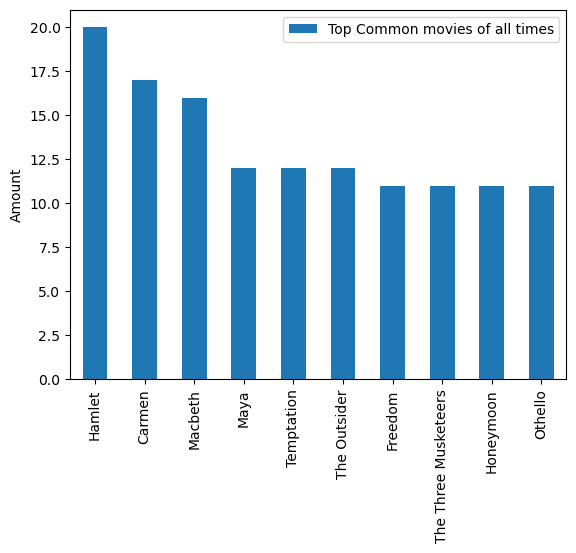

In [146]:
top_ten.plot(kind='bar', ylabel='Amount')
plt.legend(["Top Common movies of all times"]) 

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [36]:
top_years = movies.year.value_counts()[:3]
top_years

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

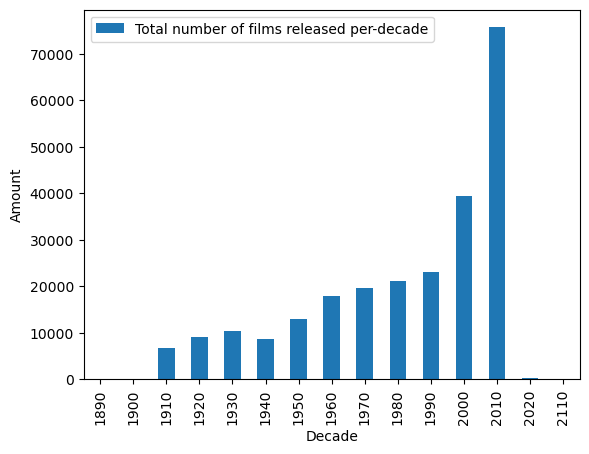

In [144]:
decade = movies.year//10*10
decade = decade.sort_values()
decades = decade.value_counts(ascending=False, sort=False)
decades.plot(kind='bar', xlabel='Decade', ylabel='Amount')
plt.legend(["Total number of films released per-decade"])

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [38]:
cast.character.value_counts()[:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [39]:
 cast[cast["character"]== "Herself"]["name"].value_counts()[:10] 

Queen Elizabeth II           12
Joyce Brothers                9
Luisa Horga                   9
Mar?a Luisa (V) Mart?n        9
Margaret Thatcher             8
Hillary Clinton               8
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Marta Berrocal                6
Sumie Sakai                   6
Name: name, dtype: int64

In [40]:
 cast[cast["character"]== "Himself"]["name"].value_counts()[:10] 

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [48]:
zombie = cast[cast.title.str.startswith('Zombie')]["title"].value_counts()[:10]
zombie

Zombie Apocalypse: Redemption    266
Zombiefied                       109
Zombie Women of Satan 2          106
Zombie Brigade                    99
Zombie Resurrection               84
Zombie Strippers                  79
Zombies Vs. Strippers             77
Zombie TV                         74
Zombie eXs                        67
Zombieland                        65
Name: title, dtype: int64

In [42]:
police = cast[cast.title.str.startswith('Police')]["title"].value_counts()[:10]
police

Police Academy 4: Citizens on Patrol         70
Police Academy                               66
Police Academy: Mission to Moscow            64
Police                                       59
Police Academy 6: City Under Siege           55
Police Academy 5: Assignment: Miami Beach    55
Police Academy 3: Back in Training           54
Police Academy 2: Their First Assignment     46
Police Rescue                                34
Police State                                 32
Name: title, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

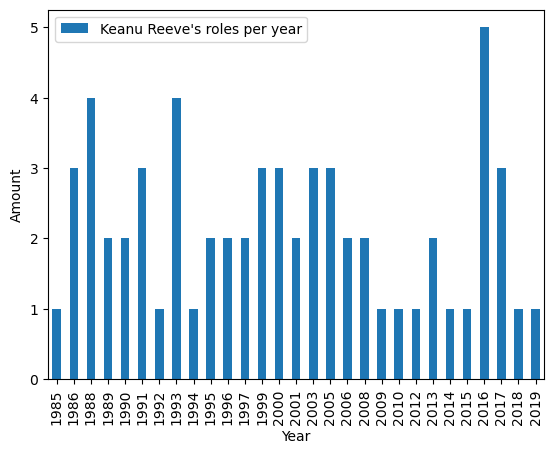

In [142]:
keanu = cast[cast["name"]== "Keanu Reeves"]["year"].value_counts()
keanu = keanu.sort_index()
keanu.plot(kind="bar", xlabel='Year', ylabel='Amount')
plt.legend(["Keanu Reeve's roles per year"])   

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.

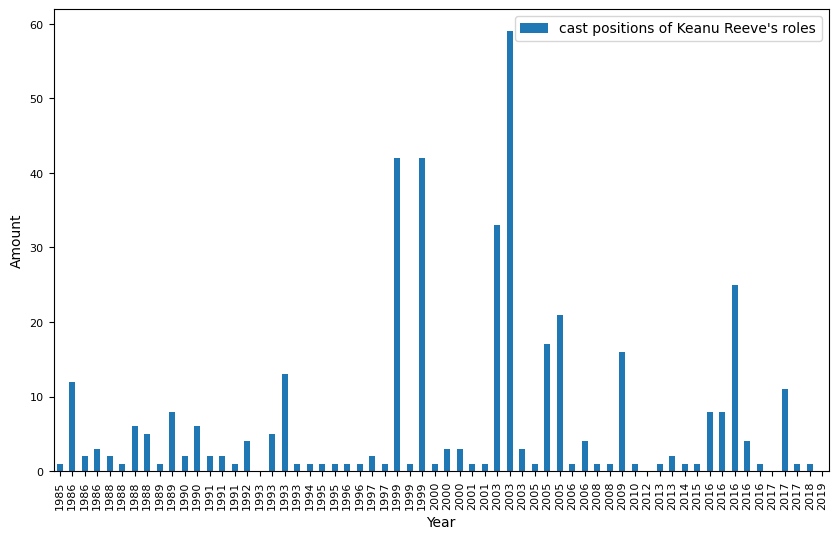

In [140]:
keanu = cast[cast["name"]== "Keanu Reeves"][["n","year"]] 
keanu = keanu.sort_values(by="year", ascending=True)
keanu.plot(kind="bar", y="n", x="year", figsize=(10, 6), fontsize=8, xlabel='Year', ylabel='Amount')
plt.legend(["Cast positions of Keanu Reeve's roles"])

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

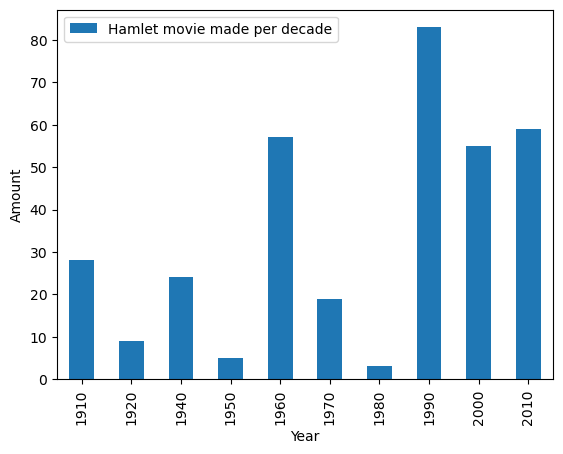

In [138]:
hamlet = cast[(cast["title"]== "Hamlet")]
hamlet_info = hamlet.year//10*10
hamlet_info = hamlet_info.value_counts().sort_index()   
hamlet_info.plot(kind = 'bar', xlabel='Decade', ylabel='Amount')
plt.legend(["Hamlet movie made per decade"])

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [46]:
leading_roles = cast[((cast.type.str.contains("actor", case=False) | cast.type.str.contains("actress", case=False)) &  (cast.n.notnull()))]
leading_roles = leading_roles.year//10*10
leading_roles = leading_roles[leading_roles == 1960].value_counts()
leading_roles

1960    131316
Name: year, dtype: int64

In [47]:
leading_roles = cast[((cast.type.str.contains("actor", case=False) | cast.type.str.contains("actress", case=False)) &  (cast.n.notnull()))]
leading_roles = leading_roles.year//10*10
leading_roles = leading_roles[leading_roles == 2000].value_counts()
leading_roles

2000    497847
Name: year, dtype: int64

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [165]:
value = cast[(cast['name'] == "Frank Oz")]
frank = cast[cast.groupby([ value.name ,"title"])['year'].transform('count') > 1].drop_duplicates("title").set_index("year").sort_index()
frank

,title,name,type,character,n
year,,,,,
1979,The Muppet Movie,Frank Oz,actor,Miss Piggy,2.0
1981,An American Werewolf in London,Frank Oz,actor,Mr. Collins,13.0
1981,The Great Muppet Caper,Frank Oz,actor,Miss Piggy,2.0
1982,The Dark Crystal,Frank Oz,actor,"Aughra, a Keeper Of Secrets (performer)",3.0
1984,The Muppets Take Manhattan,Frank Oz,actor,Miss Piggy,2.0
1985,Follow That Bird,Frank Oz,actor,Cookie Monster,3.0
1992,The Muppet Christmas Carol,Frank Oz,actor,Miss Piggy as Emily Cratchit,5.0
1996,Muppet Treasure Island,Frank Oz,actor,Miss Piggy,14.0
1999,Muppets from Space,Frank Oz,actor,Miss Piggy,7.0


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [64]:
value = cast[(cast['name'] == "Frank Oz")]
frank = cast[cast.groupby([ value.name ,"character"])['year'].transform('count') > 2].drop_duplicates("character").set_index("character")
frank

,title,year,name,type,n
character,,,,,
Miss Piggy,An American Werewolf in London,1981,Frank Oz,actor,13.0
Cookie Monster,Follow That Bird,1985,Frank Oz,actor,3.0
Bert,Follow That Bird,1985,Frank Oz,actor,3.0
Fozzie Bear,Muppet Treasure Island,1996,Frank Oz,actor,14.0
Sam the Eagle,Muppet Treasure Island,1996,Frank Oz,actor,14.0
Animal,Muppet Treasure Island,1996,Frank Oz,actor,14.0
Yoda,Star Wars: Episode I - The Phantom Menace,1999,Frank Oz,actor,12.0


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

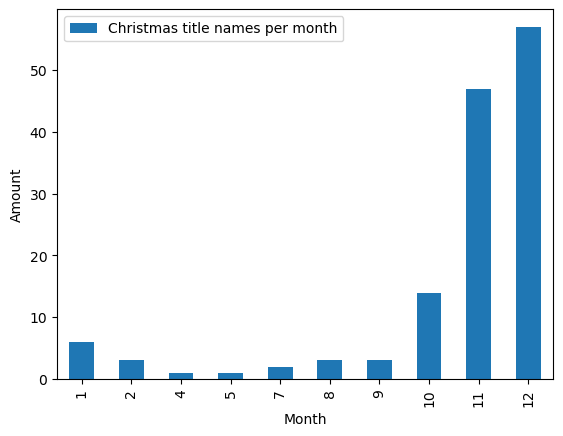

In [137]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar', xlabel='Month', ylabel='Amount')
plt.legend(["Christmas title names per month"])

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

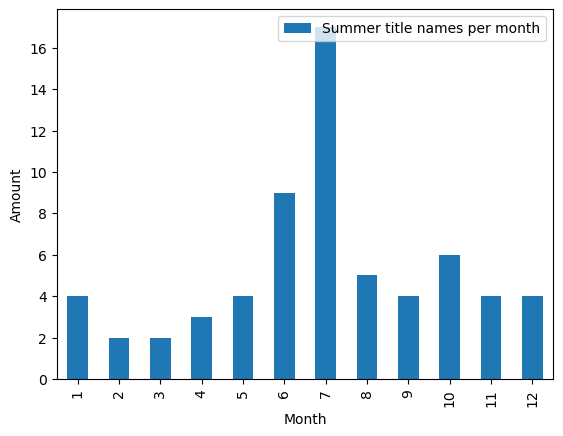

In [136]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar', xlabel='Month', ylabel='Amount')
plt.legend(["Summer title names per month"])

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

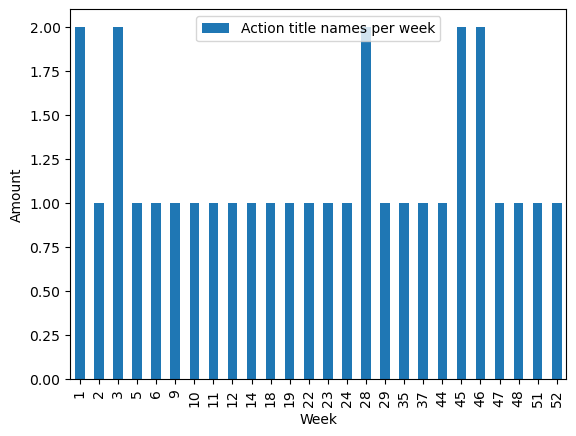

In [134]:
summer = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
summer.date.dt.isocalendar().week.value_counts().sort_index().plot(kind='bar' , xlabel='Week', ylabel='Amount')
plt.legend(["Action title names per week"])

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [131]:
merged_dataset = pd.merge(cast, release_dates)
keanu2 = merged_dataset[(merged_dataset.name.str.contains('Keanu Reeves')) & (merged_dataset.country == 'USA')& (merged_dataset.n.notnull())].set_index("date").sort_index()
keanu2

,title,year,name,type,character,n,country
date,,,,,,,
1986-01-31,Youngblood,1986,Keanu Reeves,actor,Heaver,12.0,USA
1987-05-08,River's Edge,1986,Keanu Reeves,actor,Matt,2.0,USA
1988-04-15,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA
1988-04-22,Permanent Record,1988,Keanu Reeves,actor,Chris Townsend,6.0,USA
1989-02-17,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA
1989-02-24,Dangerous Liaisons,1988,Keanu Reeves,actor,Chevalier Danceny,5.0,USA
1989-05-26,Parenthood,1989,Keanu Reeves,actor,Tod,8.0,USA
1990-04-06,I Love You to Death,1990,Keanu Reeves,actor,Marlon,6.0,USA
1990-11-02,Tune in Tomorrow...,1990,Keanu Reeves,actor,Martin Loader,2.0,USA


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

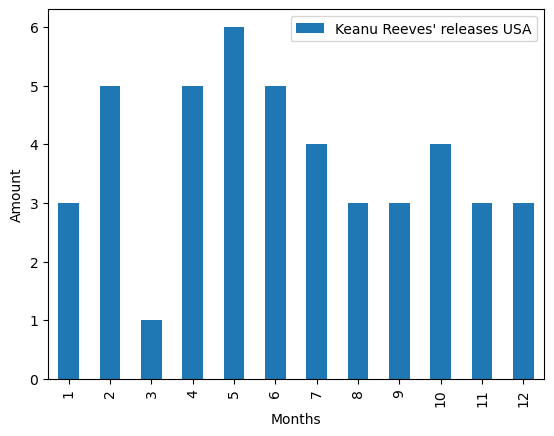

In [132]:
keanu2.index.month.value_counts().sort_index().plot(kind='bar', xlabel='Months', ylabel='Amount')
plt.legend(["Keanu Reeves' releases USA"])

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

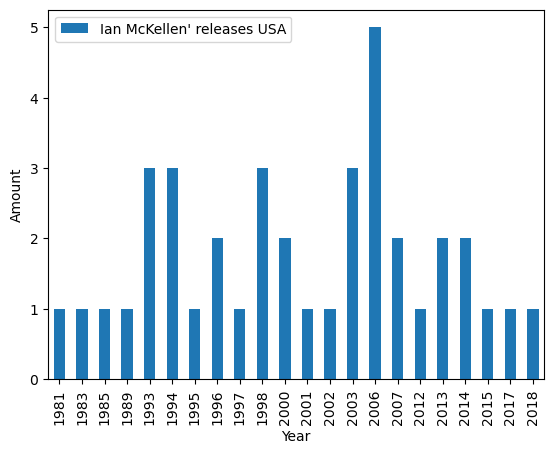

In [133]:
ian = merged_dataset[(merged_dataset.name.str.contains('Ian McKellen')) & (merged_dataset.country == 'USA')].set_index("date").sort_index()
ian.index.year.value_counts().sort_index().plot(kind='bar', xlabel='Year', ylabel='Amount')
plt.legend(["Ian McKellen' releases USA"])